In [1]:
pip install coremltools 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 8.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Input

In [58]:
(x_train, y_train), (x_test, y_test) = load_data()

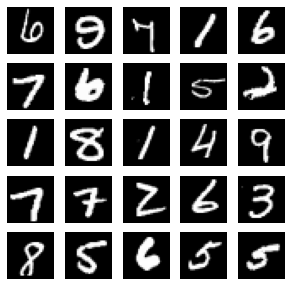

In [59]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [60]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [61]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

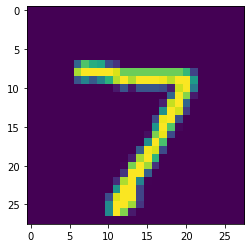

In [64]:
plt.imshow(x_test[0])

In [65]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [66]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim =input_size))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_labels, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=256, validation_split = 0.2)


Epoch 1/20


2022-03-24 12:41:58.479115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 1.1029 - accuracy: 0.6665

2022-03-24 12:42:01.214330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 5s 14ms/step - loss: 1.1029 - accuracy: 0.6665 - val_loss: 0.8101 - val_accuracy: 0.8547
Epoch 2/20
188/188 [==============================] - 2s 12ms/step - loss: 0.4360 - accuracy: 0.8828 - val_loss: 0.3606 - val_accuracy: 0.9031
Epoch 3/20
188/188 [==============================] - 2s 13ms/step - loss: 0.3230 - accuracy: 0.9108 - val_loss: 0.2938 - val_accuracy: 0.9173
Epoch 4/20
188/188 [==============================] - 3s 13ms/step - loss: 0.2812 - accuracy: 0.9204 - val_loss: 0.2620 - val_accuracy: 0.9252
Epoch 5/20
188/188 [==============================] - 2s 12ms/step - loss: 0.2562 - accuracy: 0.9267 - val_loss: 0.2444 - val_accuracy: 0.9297
Epoch 6/20
188/188 [==============================] - 2s 12ms/step - loss: 0.2413 - accuracy: 0.9304 - val_loss: 0.2351 - val_accuracy: 0.9327
Epoch 7/20
188/188 [==============================] - 3s 13ms/step - loss: 0.2286 - accuracy: 0.9344 - val_loss: 0.2273 - val_accuracy: 0.9347
Epoch 8/20

In [67]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1979 - accuracy: 0.9414


[0.19789595901966095, 0.9414000511169434]

In [68]:
predictions = model.predict(x_test)

2022-03-24 12:42:49.545848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [69]:
predictions = np.argmax(predictions, axis = 1)
print(predictions)

[7 2 1 ... 4 5 6]


In [70]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

let's say we are satisfied of the performances of our model in identify handwrittend digits, sot it's the moment to bring our custom model inside the Xcode project for our app

In [72]:
import coremltools as cmt

In [73]:
mlmodel = cmt.convert(model)

2022-03-24 12:55:10.285124: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-03-24 12:55:10.293646: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-03-24 12:55:10.312241: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-24 12:55:10.313581: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-24 12:55:10.338973: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1164] Optimization results for grappler item: graph_to_optimize
  function_optimizer: funct

In [75]:
#save the model 

mlmodel.save('custom_mlp.mlmodel')

we are ready to go, we simply need to drag our model inside our Xcode project !!! That's great, isn't it ?